In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.loc[12]

PassengerId                                13
Survived                                    0
Pclass                                      3
Name           Saundercock, Mr. William Henry
Sex                                      male
Age                                      20.0
SibSp                                       0
Parch                                       0
Ticket                              A/5. 2151
Fare                                     8.05
Cabin                                     NaN
Embarked                                    S
Name: 12, dtype: object

In [6]:
df.loc[5, 'Age'] = '27'
df.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          27
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [7]:
(pd.to_numeric(df["Age"]) > 18).sum()

576

In [8]:
((df["Sex"] == 'male').sum())/len(df)*100



64.75869809203144

In [9]:
df['Pclass'].value_counts().sort_index().reset_index(name='Number of Passengers').rename(columns={'index': 'Class'})

,Class,Number of Passengers
0,1,216
1,2,184
2,3,491


In [10]:
(df['Embarked'].value_counts(normalize=True) * 100).reset_index().rename(columns={'index': 'Embarked', 'Embarked': 'Percentage of Passengers'})

,Embarked,Percentage of Passengers
0,S,72.440945
1,C,18.897638
2,Q,8.661417


In [11]:
df[df['PassengerId'] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [12]:
df[df['Name'].str.contains('Fannie')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5,NaN,S


In [13]:
numMale = 0
numFemale = 0
survivorsMale = 0
survivorsFemale = 0
for i in range(len(df)):
    if df.loc[i, 'Sex'] == 'male':
        numMale += 1
        if df.loc[i,'Survived'] == 1:
            survivorsMale += 1
    else:
        numFemale += 1
        if df.loc[i, 'Survived'] == 1:
            survivorsFemale += 1
pd.DataFrame({'Male': [numMale, survivorsMale,int(survivorsMale/numMale*100)], 'Female': [numFemale, survivorsFemale,int(survivorsFemale/numFemale*100)]}, index=['Total', 'Survivors', 'Percent Survived'])

,Male,Female
Total,577,314
Survivors,109,233
Percent Survived,18,74


In [14]:
numChild = 0
numTeen = 0
numYA = 0
numAdult = 0
numElder = 0
surChild = 0
surTeen = 0
surYA = 0
surAdult = 0
surElder = 0
for i in range(len(df)):
    
    if pd.isna(df.loc[i, 'Age']):
        continue
    
    age = int(df.loc[i, 'Age'])
    survived = df.loc[i, 'Survived']
    
    if age <= 12:
        numChild += 1
        if survived == 1:
            surChild += 1
    elif age <= 19:
        numTeen += 1
        if survived == 1:
            surTeen += 1
    elif age <= 35:
        numYA += 1
        if survived == 1:
            surYA += 1
    elif age <= 65:
        numAdult += 1
        if survived == 1:
            surAdult += 1
    else:
        numElder += 1
        if survived == 1:
            surElder += 1

pd.DataFrame(
    {
        "Children": [numChild, surChild, int(surChild / numChild * 100), 100-int(surChild / numChild * 100) ],
        "Teen": [numTeen, surTeen, int(surTeen / numTeen * 100), 100-int(surTeen / numTeen * 100)],
        "Young Adults": [numYA, surYA, int(surYA / numYA * 100), 100-int(surYA / numYA * 100)],
        "Adults": [numAdult, surAdult, int(surAdult / numAdult * 100), 100-int(surAdult / numAdult * 100)],
        "Elderly": [numElder, surElder, int(surElder / numElder * 100), 100-int(surElder / numElder * 100)],
        "Total": [
            numChild + numTeen + numYA + numAdult + numElder,
            surChild + surTeen + surYA + surAdult + surElder,
            int(
                (surChild + surTeen + surYA + surAdult + surElder)
                / (numChild + numTeen + numYA + numAdult + numElder) * 100
            ) if (numChild + numTeen + numYA + numAdult + numElder) > 0 else 0,
            100 - int(
                (surChild + surTeen + surYA + surAdult + surElder)
                / (numChild + numTeen + numYA + numAdult + numElder) * 100
            ) if (numChild + numTeen + numYA + numAdult + numElder) > 0 else 0
        ]
    },
    index=["Total", "Survivors", "Percent Survived", "Percent Died"]
)


,Children,Teen,Young Adults,Adults,Elderly,Total
Total,69,95,334,209,8,715
Survivors,40,39,128,82,1,290
Percent Survived,57,41,38,39,12,40
Percent Died,43,59,62,61,88,60


In [15]:
numC = 0
surC = 0
numS = 0
surS = 0
numQ = 0
surQ = 0
for i in range(len(df)):
    
    if pd.isna(df.loc[i, 'Embarked']):
        continue
    
    if df.loc[i, 'Embarked'] == 'C':
        numC += 1
        if df.loc[i, 'Survived'] == 1:
            surC += 1
    elif df.loc[i, 'Embarked'] == 'S':
        numS += 1
        if df.loc[i, 'Survived'] == 1:
                surS += 1
    elif df.loc[i, 'Embarked'] == 'Q':
        numQ += 1
        if df.loc[i, 'Survived'] == 1:
                surQ += 1

pd.DataFrame(
    {
        "C": [numC,surC,surC/numC*100,(1-surC/numC)*100],
        "S": [numS,surS,surS/numS*100,(1-surS/numS)*100],
        "Q": [numQ,surQ,surQ/numQ*100,(1-surQ/numQ)*100],        
    },
    index=["Total", "Survivors", "Percent Survived", "Percent Died"]
)


,C,S,Q
Total,168.000000,644.000000,77.000000
Survivors,93.000000,217.000000,30.000000
Percent Survived,55.357143,33.695652,38.961039
Percent Died,44.642857,66.304348,61.038961


<AxesSubplot:xlabel='Ages', ylabel='Count'>

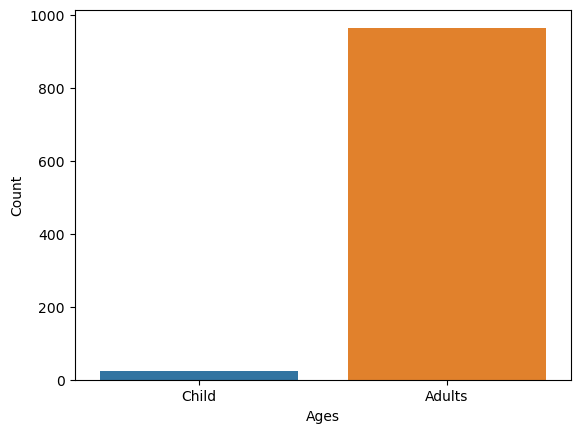

In [16]:
dfE = pd.read_csv("estonia.csv")
ageGroups = {"Ages":["Child","Adults"], "Count":[0, 0]}
for person in dfE["Age"]:
    if person < 18:
        ageGroups["Count"][0] += 1
    else:
        ageGroups["Count"][1] += 1
ageDf = pd.DataFrame(ageGroups)
sns.barplot(x = "Ages", y = "Count", data=ageDf)

<AxesSubplot:xlabel='Age Group', ylabel='value'>

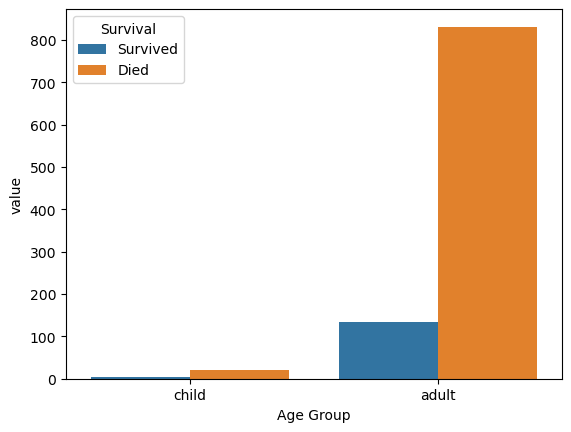

In [17]:
df = pd.read_csv("estonia.csv")

data = {
    'Age Group': ['child', 'adult'],
    'Survived': [3, 134],
    'Died': [21, 831]
}

age_survival = pd.DataFrame(data)
age_survival = pd.melt(age_survival, id_vars="Age Group")
age_survival = age_survival.rename(columns={"variable": "Survival"})

sns.barplot(x="Age Group", y="value", hue="Survival", data=age_survival)

In [20]:
df = pd.read_csv("estonia.csv")

data = {
    'Age Group': ['child', 'adult'],
    'Survived': [3, 134],
    'Died': [21, 831]
}

age_survival = pd.DataFrame(data)
age_survival = pd.melt(age_survival, id_vars="Age Group")
age_survival = age_survival.rename(columns={"variable": "Survival"})

contingency_table = age_survival.pivot_table(index='Age Group', columns='Survival', values='value', aggfunc='sum')
print(contingency_table)


Survival   Died  Survived
Age Group                
adult       831       134
child        21         3
